In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict
import NN_models as models
import NN_utils as utils
import NN_utils.train_and_eval as TE
import torch_data
import random


In [2]:
import torchvision
import os
REPOSITORY_PATH = r'/home/luis-felipe/UncEst'
DATA_PATH = os.path.join(REPOSITORY_PATH,'data')
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = os.path.join(REPOSITORY_PATH,'torch_models')
PATH_TRAINER = os.path.join(PATH_MODELS,'trainer')

PATH_FIGS = os.path.join(REPOSITORY_PATH,'notebooks-scripts','paper1','figs')

In [3]:
from torchvision.models import resnet50, ResNet50_Weights

In [4]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


In [5]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [6]:
DATA_PATH = os.path.join(REPOSITORY_PATH,'data','tiny-imagenet-200')

data = torch_data.TinyImageNet(data_dir = DATA_PATH,train = False)

In [7]:
data.test_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 10003
    Root location: /home/luis-felipe/UncEst/data/tiny-imagenet-200/val/images
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [8]:
image,label = data.get_sample()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


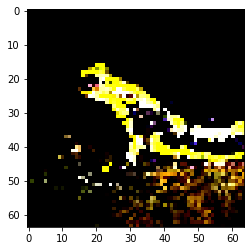

In [9]:
plt.imshow(image[71].permute(1, 2, 0))

In [25]:
TE.model_acc(model,data.test_dataloader)

0.009997000899730081

In [11]:
data.get_classes(DATA_PATH)

('entity',
 'physical entity',
 'abstraction, abstract entity',
 'thing',
 'object, physical object',
 'whole, unit',
 'congener',
 'living thing, animate thing',
 'organism, being',
 'benthos',
 'dwarf',
 'heterotroph',
 'parent',
 'life',
 'biont',
 'cell',
 'causal agent, cause, causal agency',
 'person, individual, someone, somebody, mortal, soul',
 'animal, animate being, beast, brute, creature, fauna',
 'plant, flora, plant life',
 'native',
 'natural object',
 'substance',
 'substance',
 'matter',
 'food, nutrient',
 'nutrient',
 'artifact, artefact',
 'article',
 'psychological feature',
 'cognition, knowledge, noesis',
 'motivation, motive, need',
 'attribute',
 'state',
 'feeling',
 'location',
 'shape, form',
 'time',
 'space, infinite',
 'absolute space',
 'phase space',
 'event',
 'process, physical process',
 'act, deed, human action, human activity',
 'group, grouping',
 'relation',
 'possession',
 'social relation',
 'communication',
 'measure, quantity, amount',
 'phen

In [15]:
torchvision.models.efficientnet.EfficientNet.from_pretrained('efficientnet-b3')

AttributeError: type object 'EfficientNet' has no attribute 'from_pretrained'

In [16]:
weights = ResNet50_Weights.DEFAULT

In [20]:
preprocess = weights.transforms()
batch = preprocess(image).unsqueeze(0)

In [24]:
data.test_dataloader.dataset.transform = weights.transforms()